In [ ]:
# Loading the yelp review dataste ans toring it into a dataframe

from datasets import load_from_disk

# Load the Yelp review data from the disk
yelp_data = load_from_disk('Documents/nlp/nlp_assignment_0_group_work/CS6120/Assignments/A4/data/train')

# Convert to a pandas dataframe and print the first 5 examples
import pandas as pd
yelp_df = pd.DataFrame(yelp_data)
yelp_df




# Total no. of records present in the dataframe

In [5]:
yelp_df.shape

(650000, 2)

# Plotting the reviews 

<Axes: xlabel='label'>

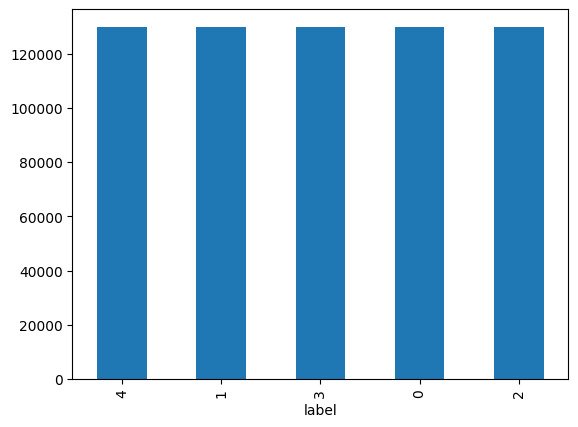

In [6]:
yelp_df.label.value_counts().plot(kind='bar')

# Storing the review with reviews with similar ratings in the respective dataframe

In [7]:
overall_4_df = yelp_df[yelp_df['label'] == 4]
overall_3_df = yelp_df[yelp_df['label'] == 3]
overall_2_df = yelp_df[yelp_df['label'] == 2]
overall_1_df = yelp_df[yelp_df['label'] == 1]
overall_0_df = yelp_df[yelp_df['label'] == 0]

# Selecting the top 50_000 records from each rating

In [8]:
overall_4_df = overall_4_df.head(50000)
overall_3_df = overall_3_df.head(50000)
overall_2_df = overall_2_df.head(50000)
overall_1_df = overall_1_df.head(50000)
overall_0_df = overall_0_df.head(50000)

# Storing the top 50_000 reviews from each rating into a single dataframe and sorting them randomly 

In [13]:
import pandas as pd
import numpy as np

combined_df = pd.concat([overall_4_df, overall_3_df, overall_1_df, overall_0_df], ignore_index=True)

combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Displaying the combined datafarme 

In [14]:
print(combined_df)

        label                                               text
0           1  Is it possible for a cigar shop to be even les...
1           3  One of my favorite spots in Tempe.  Offers a v...
2           0  Being from New Mexico I thought id go here and...
3           3  Food is awesome but drinks are kind of watered...
4           4  Bouchon is a great place to enjoy brunch after...
...       ...                                                ...
199995      1  Let me sum up Sweet Cakes for you in two words...
199996      1  Oh, AJ's. If you didn't exist less than 3 bloc...
199997      1  You know I've seen this place showcased on Foo...
199998      1  I don't understand all of the hype. I had lamb...
199999      1  I ordered the 5 fried tacos. The filling was a...

[200000 rows x 2 columns]


# Plotting the review with the respective rating in the bar graph

<Axes: xlabel='label'>

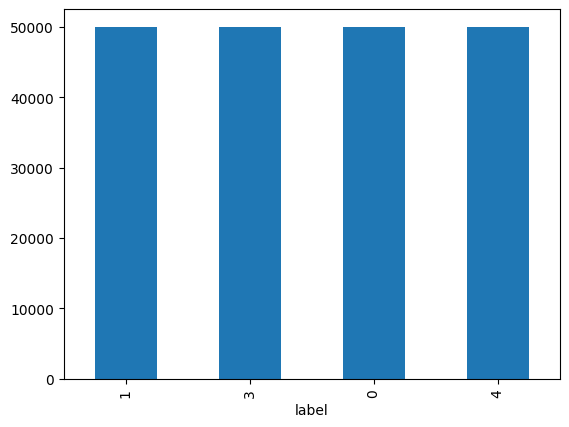

In [15]:
import matplotlib.pyplot as plt

combined_df.label.value_counts().plot(kind='bar')

# Creating a sentiment column and setting the value as negative for ratings (0,1) and positive for ratings (3,4)

In [18]:
combined_df['sentiment'] = combined_df['label'].apply(lambda x: 'positive' if x in [4, 3] else 'negative')

In [22]:
highlights = combined_df.text

# Dispalying the most commonly used words in all the reviews

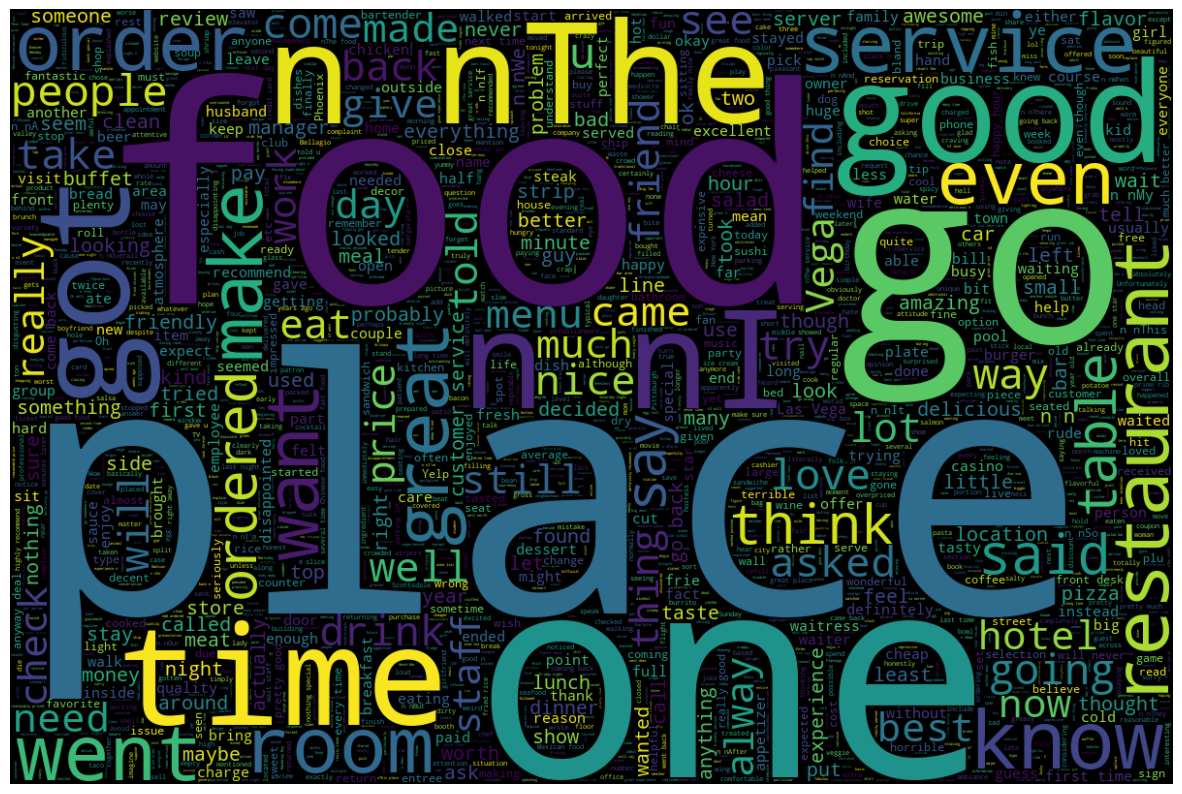

In [23]:
from wordcloud import WordCloud

plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(highlights))
plt.axis("off")
plt.imshow(wordcloud,interpolation = 'bilinear');

# Storing the combined dataframe into review set

In [24]:
review_set = combined_df

# Displaying the review set

In [25]:
review_set.head

<bound method NDFrame.head of         label                                               text sentiment
0           1  Is it possible for a cigar shop to be even les...  negative
1           3  One of my favorite spots in Tempe.  Offers a v...  positive
2           0  Being from New Mexico I thought id go here and...  negative
3           3  Food is awesome but drinks are kind of watered...  positive
4           4  Bouchon is a great place to enjoy brunch after...  positive
...       ...                                                ...       ...
199995      1  Let me sum up Sweet Cakes for you in two words...  negative
199996      1  Oh, AJ's. If you didn't exist less than 3 bloc...  negative
199997      1  You know I've seen this place showcased on Foo...  negative
199998      1  I don't understand all of the hype. I had lamb...  negative
199999      1  I ordered the 5 fried tacos. The filling was a...  negative

[200000 rows x 3 columns]>

# Treating the data before passing it to the sentiment analysis models

# Converting to lowercase

In [27]:
review_set['text'] = review_set['text'].apply(lambda x: str(x).lower())
review_set.head(10)

,label,text,sentiment
0,1,is it possible for a cigar shop to be even les...,negative
1,3,one of my favorite spots in tempe. offers a v...,positive
2,0,being from new mexico i thought id go here and...,negative
3,3,food is awesome but drinks are kind of watered...,positive
4,4,bouchon is a great place to enjoy brunch after...,positive
5,4,"a friend and i came here to eat before the \""l...",positive
6,1,okay i came here with a group of friends so we...,negative
7,0,probably the worst place i have ever walked in...,negative
8,1,i guess since i'm in my thirties now and marri...,negative
9,4,my wife and i went here for a weekend getaway ...,positive


# Removing special characters

In [28]:
import re

review_set['text'] = review_set['text'].apply(lambda x: re.sub(r'[!@#$%^&*()_+=\-~`;:\'",.<>/?|\\]', '', x))
review_set.head(10)

,label,text,sentiment
0,1,is it possible for a cigar shop to be even les...,negative
1,3,one of my favorite spots in tempe offers a ve...,positive
2,0,being from new mexico i thought id go here and...,negative
3,3,food is awesome but drinks are kind of watered...,positive
4,4,bouchon is a great place to enjoy brunch after...,positive
5,4,a friend and i came here to eat before the lov...,positive
6,1,okay i came here with a group of friends so we...,negative
7,0,probably the worst place i have ever walked in...,negative
8,1,i guess since im in my thirties now and marrie...,negative
9,4,my wife and i went here for a weekend getaway ...,positive


# Standardizing the data format in the dataset

In [29]:
review_set['text'] = review_set['text'].apply(lambda x: re.sub(r'(\d{1,2})/(\d{1,2})/(\d{4})', r'\2-\1-\3', x))
review_set.head(10)

,label,text,sentiment
0,1,is it possible for a cigar shop to be even les...,negative
1,3,one of my favorite spots in tempe offers a ve...,positive
2,0,being from new mexico i thought id go here and...,negative
3,3,food is awesome but drinks are kind of watered...,positive
4,4,bouchon is a great place to enjoy brunch after...,positive
5,4,a friend and i came here to eat before the lov...,positive
6,1,okay i came here with a group of friends so we...,negative
7,0,probably the worst place i have ever walked in...,negative
8,1,i guess since im in my thirties now and marrie...,negative
9,4,my wife and i went here for a weekend getaway ...,positive


# Expanding englisg words can't -> cannot

In [30]:
import contractions

review_set['text'] = review_set['text'].apply(lambda x: contractions.fix(x))
review_set.head(10)

,label,text,sentiment
0,1,is it possible for a cigar shop to be even les...,negative
1,3,one of my favorite spots in tempe offers a ve...,positive
2,0,being from new mexico i thought id go here and...,negative
3,3,food is awesome but drinks are kind of watered...,positive
4,4,bouchon is a great place to enjoy brunch after...,positive
5,4,a friend and i came here to eat before the lov...,positive
6,1,okay i came here with a group of friends so we...,negative
7,0,probably the worst place i have ever walked in...,negative
8,1,i guess since i am in my thirties now and marr...,negative
9,4,my wife and i went here for a weekend getaway ...,positive


# Removing stop words

In [31]:
import nltk
from nltk.corpus import stopwords
import pandas as pd

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
additional_stopwords = {'is', 'of', 'an'}

stop_words.update(additional_stopwords)
review_set['text'] = review_set['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
review_set.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aishwaryaravichandran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,text,sentiment
0,1,possible cigar shop even less friendly fair oa...,negative
1,3,one favorite spots tempe offers eclectic irish...,positive
2,0,new mexico thought id go amazing green red chi...,negative
3,3,food awesome drinks kind watered sitting outsi...,positive
4,4,bouchon great place enjoy brunch crazy nights ...,positive
5,4,friend came eat love show food service wonderf...,positive
6,1,okay came group friends decided book nice suit...,negative
7,0,probably worst place ever walked intonni would...,negative
8,1,guess since thirties married two kids vegas bi...,negative
9,4,wife went weekend getaway nice rooms great res...,positive


# Printing the first record in the dataset

In [32]:
review_set['text'][0]

'possible cigar shop even less friendly fair oaks yesor least found tie nnive twice answer questions attempt enter discussion met look like guy friendlier fair oaks marginally two guys working times visited seems least one would give time day also someone said regulars joy hang really two guys ones working front lounge visits neither time much nod hello maybe visiting wrong time least charge extra priviledge hanging like tinderbox ahwatukee others nnthat said selection good place old wellworn feel like lot smells like really oldschool smoke shopnews stands youth pipe smoker seen better selection phoenix cigar area also wellstocked prices would expect nntwo stars three stars someone friendly working would say four look buy cigar pipe tobacco anything else matter online pay lot less go places chat cigars get ideas try new stuffhopefully supporting local business little bargain grade high service friendliness comes cigar shops two two visits resulted feeling intruding private club nnbased

# Printing the dataset 

In [33]:
review_set

,label,text,sentiment
0,1,possible cigar shop even less friendly fair oa...,negative
1,3,one favorite spots tempe offers eclectic irish...,positive
2,0,new mexico thought id go amazing green red chi...,negative
3,3,food awesome drinks kind watered sitting outsi...,positive
4,4,bouchon great place enjoy brunch crazy nights ...,positive
...,...,...,...
199995,1,let sum sweet cakes two words ratednnmy wife l...,negative
199996,1,oh ajs exist less 3 blocks apartment would nev...,negative
199997,1,know seen place showcased food network 5 times...,negative
199998,1,understand hype lamb vindaloo meh meat potatoe...,negative


# Normalizing data

Data normalization is important to reduce sparseness and remove faulty aspects of the data.

# Spell Correction

In [34]:
from symspellpy import SymSpell, Verbosity
import pkg_resources

sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt"
)
sym_spell.load_dictionary( dictionary_path,term_index=0, count_index=1)

True

In [36]:
def correct_spelling(text):
    suggestions = sym_spell.lookup_compound(text, max_edit_distance=2)
    return suggestions[0].term if suggestions else text

review_set['text'] = review_set['text'].apply(correct_spelling)

In [37]:
review_set.to_csv('review_set.csv', index=False)

In [38]:
dataset = pd.read_csv('review_set.csv')
dataset.shape

(200000, 3)

In [41]:
print(dataset)

        label                                               text sentiment
0           1  possible cigar shop even less friendly fair oa...  negative
1           3  one favourite spots tempe offers eclectic iris...  positive
2           0  new mexico thought id go amazing green red chi...  negative
3           3  food awesome drinks kind watered sitting outsi...  positive
4           4  bourbon great place enjoy brunch crazy nights ...  positive
...       ...                                                ...       ...
199995      1  let sum sweet cakes two words rated my wife lo...  negative
199996      1  of as exist less a blocks apartment would neve...  negative
199997      1  know seen place showcased food network a times...  negative
199998      1  understand hype lamb linda loo meh meat potato...  negative
199999      1  ordered a fried tacos filling little bland fir...  negative

[200000 rows x 3 columns]


In [42]:
dataset['text'] = dataset['text'].str.replace('\d+', '', regex=True)

In [46]:
dataset.to_csv('review_set_latest.csv', index=False)

# Storing the dataset into a csv

In [4]:
import pandas as pd

ds = pd.read_csv('/Users/Documents/nlp/nlp_assignment_0_group_work/CS6120/Assignments/A4/data/review_set_latest.csv')
ds.shape

(200000, 3)

In [8]:
subset = ds.head(50000).copy()
subset.shape
print(subset)

       label                                               text sentiment
0          1  possible cigar shop even less friendly fair oa...  negative
1          3  one favourite spots tempe offers eclectic iris...  positive
2          0  new mexico thought id go amazing green red chi...  negative
3          3  food awesome drinks kind watered sitting outsi...  positive
4          4  bourbon great place enjoy brunch crazy nights ...  positive
...      ...                                                ...       ...
49995      1  told acquaintance best bbl urban turns everyth...  negative
49996      0  people rip indicted drugs prostitution thousan...  negative
49997      1  plus side room clean good condition offered re...  negative
49998      1  worst experience ever red robbin food make tab...  negative
49999      4  wait staff friendly quick keep drink refilled ...  positive

[50000 rows x 3 columns]


In [6]:
column_dtype = subset['text'].dtype
print(column_dtype)

object


# Running the sentiment analysis models

# Model 1 -> distilbert-base-uncased-finetuned-sst-2-english

In [90]:
from transformers import pipeline

model_pipeline_1 = pipeline(model="distilbert-base-uncased-finetuned-sst-2-english", task="sentiment-analysis")

subset['text'] = subset['text'].astype(str)

subset['text'] = subset['text'].replace('None', pd.NA)
subset['text'] = subset['text'].dropna()

result_1 = subset.head(50000)

sentiment_scores_1 = []

for review in result_1['text']:
    # Perform sentiment analysis using the pipeline
    sentiment_result_1 = model_pipeline_1(review[0:501])
    sentiment_scores_1.append(sentiment_result_1[0]['label'])

result_1['sentiment_analysis'] = sentiment_scores_1

output_1 = result_1['sentiment_analysis']

print(output_1)

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


0        NEGATIVE
1        POSITIVE
2        NEGATIVE
3        POSITIVE
4        POSITIVE
           ...   
49995    NEGATIVE
49996    NEGATIVE
49997    NEGATIVE
49998    NEGATIVE
49999    NEGATIVE
Name: sentiment_analysis, Length: 50000, dtype: object


/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_13809/115384889.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_1['sentiment_analysis'] = sentiment_scores_1


# Storing model 1 results into a csv

In [125]:
output_1.to_csv('model_1.csv', index=False)

# Model 2 -> cardiffnlp/twitter-roberta-base-sentiment-latest

In [16]:
from transformers import pipeline

model_pipeline_2 = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment-latest", task="sentiment-analysis")

subset['text'] = subset['text'].astype(str)

subset['text'] = subset['text'].replace('None', pd.NA)
subset['text'] = subset['text'].dropna()

result_2 = subset.head(50000)

sentiment_scores_2 = []

for review in result_2['text']:
    # Perform sentiment analysis using the pipeline
    sentiment_result_2 = model_pipeline_2(review[0:501])
    sentiment_scores_2.append(sentiment_result_2[0]['label'])

result_2['sentiment_analysis'] = sentiment_scores_2

output_2 = result_2['sentiment_analysis']

print(output_2)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


0         neutral
1        positive
2        positive
3        positive
4        positive
           ...   
49995    negative
49996    negative
49997     neutral
49998    negative
49999    positive
Name: sentiment_analysis, Length: 50000, dtype: object


/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_10477/2942143617.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_2['sentiment_analysis'] = sentiment_scores_2


# Storing model 2 results into a csv

In [17]:
output_2.to_csv('model_2.csv', index=False)

# Model 3 -> siebert/sentiment-roberta-large-english

In [20]:
from transformers import pipeline

model_pipeline_3 = pipeline(model="siebert/sentiment-roberta-large-english", task="sentiment-analysis")

subset['text'] = subset['text'].astype(str)

subset['text'] = subset['text'].replace('None', pd.NA)
subset['text'] = subset['text'].dropna()

result_3 = subset.head(50000)

sentiment_scores_3 = []

for review in result_3['text']:
    # Perform sentiment analysis using the pipeline
    sentiment_result_3 = model_pipeline_3(review[0:501])
    sentiment_scores_3.append(sentiment_result_3[0]['label'])

result_3['sentiment_analysis'] = sentiment_scores_3

output_3 = result_3['sentiment_analysis']

print(output_3)

0        NEGATIVE
1        POSITIVE
2        NEGATIVE
3        POSITIVE
4        POSITIVE
           ...   
49995    NEGATIVE
49996    NEGATIVE
49997    NEGATIVE
49998    NEGATIVE
49999    POSITIVE
Name: sentiment_analysis, Length: 50000, dtype: object


/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_10477/3425327793.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_3['sentiment_analysis'] = sentiment_scores_3


# Storing model 3 results into a csv

In [21]:
output_3.to_csv('model_3.csv', index=False)

In [23]:
result_1 = pd.read_csv('/Users/Documents/nlp/nlp_assignment_0_group_work/CS6120/Assignments/A4/data/model_1.csv')

# Combining all the model results into a single dataframe

In [24]:
sentiment_comparison = subset.head(50000)
sentiment_comparison['model_1'] = result_1['sentiment_analysis']
sentiment_comparison['model_2'] = result_2['sentiment_analysis']
sentiment_comparison['model_3'] = result_3['sentiment_analysis']

print(sentiment_comparison)

       label                                               text sentiment  \
0          1  possible cigar shop even less friendly fair oa...  negative   
1          3  one favourite spots tempe offers eclectic iris...  positive   
2          0  new mexico thought id go amazing green red chi...  negative   
3          3  food awesome drinks kind watered sitting outsi...  positive   
4          4  bourbon great place enjoy brunch crazy nights ...  positive   
...      ...                                                ...       ...   
49995      1  told acquaintance best bbl urban turns everyth...  negative   
49996      0  people rip indicted drugs prostitution thousan...  negative   
49997      1  plus side room clean good condition offered re...  negative   
49998      1  worst experience ever red robbin food make tab...  negative   
49999      4  wait staff friendly quick keep drink refilled ...  positive   

        model_1   model_2   model_3  
0      NEGATIVE   neutral  NEGATIVE  

/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_10477/2115886852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_comparison['model_1'] = result_1['sentiment_analysis']
/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_10477/2115886852.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_comparison['model_2'] = result_2['sentiment_analysis']
/var/folders/nb/sgb5l3c56gx84mnvsmg95cz00000gn/T/ipykernel_10477/2115886852.py:4: SettingWithCopyWarning: 
A value is trying t